In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.feature_selection import SelectKBest, chi2

from sklearn import model_selection
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

from sklearn.preprocessing import StandardScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix

from scipy.stats import randint

from imblearn.under_sampling import RandomUnderSampler

In [3]:
df = pd.read_csv('final_output.csv')
df.head(10)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,0,16.60,1,0,0,3.0,30.0,0,0,8,5,1,1,4,5.0,1,0,1
1,0,20.34,0,0,1,0.0,0.0,0,0,13,5,2,1,4,7.0,0,0,0
2,0,26.58,1,0,0,20.0,30.0,0,1,10,5,1,1,2,8.0,1,0,0
3,0,24.21,0,0,0,0.0,0.0,0,0,12,5,2,0,3,6.0,0,0,1
4,0,23.71,0,0,0,28.0,0.0,1,0,5,5,2,1,4,8.0,0,0,0
5,1,28.87,1,0,0,6.0,0.0,1,0,12,3,2,0,2,12.0,0,0,0
6,0,21.63,0,0,0,15.0,0.0,0,0,11,5,2,1,2,4.0,1,0,1
7,0,31.64,1,0,0,5.0,0.0,1,0,13,5,1,0,3,9.0,1,0,0
8,0,26.45,0,0,0,0.0,0.0,0,0,13,5,3,0,2,5.0,0,1,0
9,0,40.69,0,0,0,0.0,0.0,1,1,10,5,2,1,3,10.0,0,0,0


In [4]:
X = df.iloc[:, 1:16].values
y = df.iloc[:, 0].values

In [5]:
#splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
#feature scaling

st_x = StandardScaler()
X_train = st_x.fit_transform(X_train)
X_test = st_x.transform(X_test)

In [7]:
#fitting the model

classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [8]:
#predicting test set
y_pred = classifier.predict(X_test)

#accuracy

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, y_pred, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division = 1))

Accuracy:  0.9041682735905107
Recall:  0.11999025459861128
Precision: 0.3333333333333333
CL Report:               precision    recall  f1-score   support

           0       0.92      0.98      0.95     87730
           1       0.33      0.12      0.18      8209

    accuracy                           0.90     95939
   macro avg       0.63      0.55      0.56     95939
weighted avg       0.87      0.90      0.88     95939



In [9]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[85760,  1970],
       [ 7224,   985]], dtype=int64)

In [10]:
#Taking care of imbalance in target variable

under_sample = RandomUnderSampler(sampling_strategy = 0.5)
X_resampled, y_resampled = under_sample.fit_resample(X_train, y_train)

In [11]:
balanced_classifier = RandomForestClassifier(n_estimators = 10, criterion = "entropy")
balanced_classifier.fit(X_resampled, y_resampled)

RandomForestClassifier(criterion='entropy', n_estimators=10)

In [12]:
y_pred = balanced_classifier.predict(X_test)

#accuracy

print('Accuracy: ', metrics.accuracy_score(y_test, y_pred))
print('Recall: ', metrics.recall_score(y_test, y_pred, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, y_pred, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, y_pred, zero_division = 1))

Accuracy:  0.8184054451265909
Recall:  0.5294189304421976
Precision: 0.24272549567160012
CL Report:               precision    recall  f1-score   support

           0       0.95      0.85      0.89     87730
           1       0.24      0.53      0.33      8209

    accuracy                           0.82     95939
   macro avg       0.60      0.69      0.61     95939
weighted avg       0.89      0.82      0.85     95939



In [13]:
#confusion matrix
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
cm

array([[74171, 13559],
       [ 3863,  4346]], dtype=int64)

In [14]:
#Hyperparameter tuning using Random search
param_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': randint(5, 20),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20)
}

In [15]:
random_classifier = RandomForestClassifier(random_state = 42)

In [16]:
random_search = RandomizedSearchCV(random_classifier, param_distributions = param_dist, n_iter = 50, scoring = 'recall', cv = 5, random_state = 42)
random_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50,
                   param_distributions={'max_depth': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D62FA64F0>,
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D62FA67C0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D62F6D8E0>,
                                        'n_estimators': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x0000020D62F8E220>},
                   random_state=42, scoring='recall')

In [23]:
best_params = random_search.best_params_

In [24]:
best_model = random_search.best_estimator_
best_recall = best_model.score(X_test, y_test)

In [25]:
print("Best hyperparameters:", best_params)
print("Best Model Recall:", best_recall)

Best hyperparameters: {'max_depth': 16, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 97}
Best Model Recall: 0.915540082760921


In [31]:
best_y_pred = best_model.predict(X_test)

In [32]:
#accuracy

print('Accuracy: ', metrics.accuracy_score(y_test, best_y_pred))
print('Recall: ', metrics.recall_score(y_test, best_y_pred, zero_division = 1))
print("Precision:", metrics.precision_score(y_test, best_y_pred, zero_division = 1))
print("CL Report:", metrics.classification_report(y_test, best_y_pred, zero_division = 1))

Accuracy:  0.915540082760921
Recall:  0.05774150322816421
Precision: 0.5629453681710214
CL Report:               precision    recall  f1-score   support

           0       0.92      1.00      0.96     87730
           1       0.56      0.06      0.10      8209

    accuracy                           0.92     95939
   macro avg       0.74      0.53      0.53     95939
weighted avg       0.89      0.92      0.88     95939



In [33]:
#confusion matrix
cm1 = confusion_matrix(y_test, best_y_pred)
cm1

array([[87362,   368],
       [ 7735,   474]], dtype=int64)

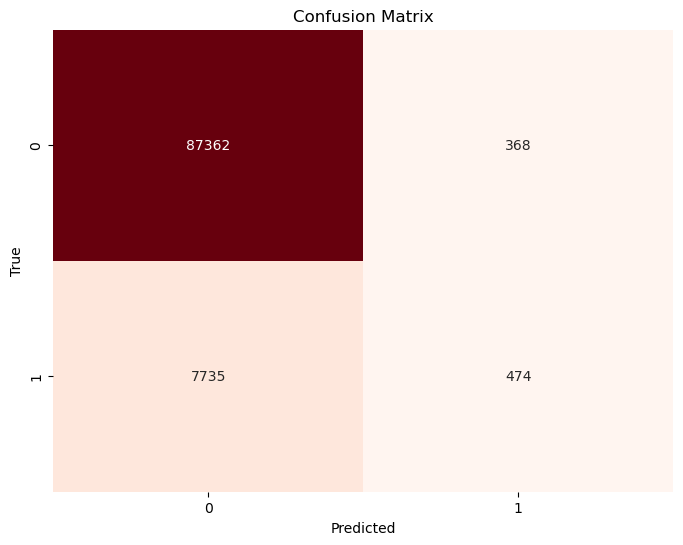

In [34]:
plt.figure(figsize = (8, 6))
sns.heatmap(cm1, annot = True, fmt = 'd', cmap = 'Reds', cbar = False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [22]:
import joblib

joblib.dump(best_model, 'rf_model.joblib')

['rf_model.joblib']